# Support Vector Machine - For Binary Classification
---

## Model used to **Regression** and **Classification** (Exercise bellow)
Source (Scikit Learn): https://scikit-learn.org/stable/modules/svm.html#svm

Aditional: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

**Support Vector Classification (SVC):** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Exercise
### **(Classification)**
### **Obese Fiches**

**Model:** ?? (Maybe Logistic Regression - Classification)

**Features:** Height,Weight

**Label:** Is obese or not (True|False values)

## Solution 1
### Logistic Regression/No Training

In [1]:
import pandas as pd

fishes_df = pd.read_csv('datasets/fish-obesity.csv')
fishes_df.head()

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


In [2]:
import numpy as np

features = fishes_df[['Height', 'Weight']]
label_is_obese = fishes_df['Obese']

X = np.array(features)
y = np.array(label_is_obese)

X.shape, y.shape

((545, 2), (545,))

In [3]:
from sklearn.linear_model import LogisticRegression

csf = LogisticRegression().fit(X, y)
csf.score(X, y)

0.9798165137614679

In [4]:
# Prediction testing
csf.predict([[120, 180]])

array([1])

## Solution 2
### SVC/No Training

In [5]:
import numpy as np
from sklearn.svm import SVC

fishes_df = pd.read_csv('datasets/fish-obesity.csv')
fishes_df.head()

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


In [6]:
features = fishes_df[['Height', 'Weight']]
label_is_obese = fishes_df['Obese']

X = np.array(features)
y = np.array(label_is_obese)

classifier = SVC(random_state=99)
classifier.fit(X, y)
classifier.score(X, y)

0.9724770642201835

In [7]:
# Prediction testing
classifier.predict([[120, 180]])

array([1])

## Solution 2.1
### SVC/Training

In [8]:
import numpy as np

fishes_df = pd.read_csv('datasets/fish-obesity.csv')

features = fishes_df[['Height', 'Weight']]
labels = fishes_df['Obese']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=99)

In [10]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9541284403669725

In [11]:
# Prediction testing
classifier.predict([[120, 180]])

array([1])

#### Plotting train classification

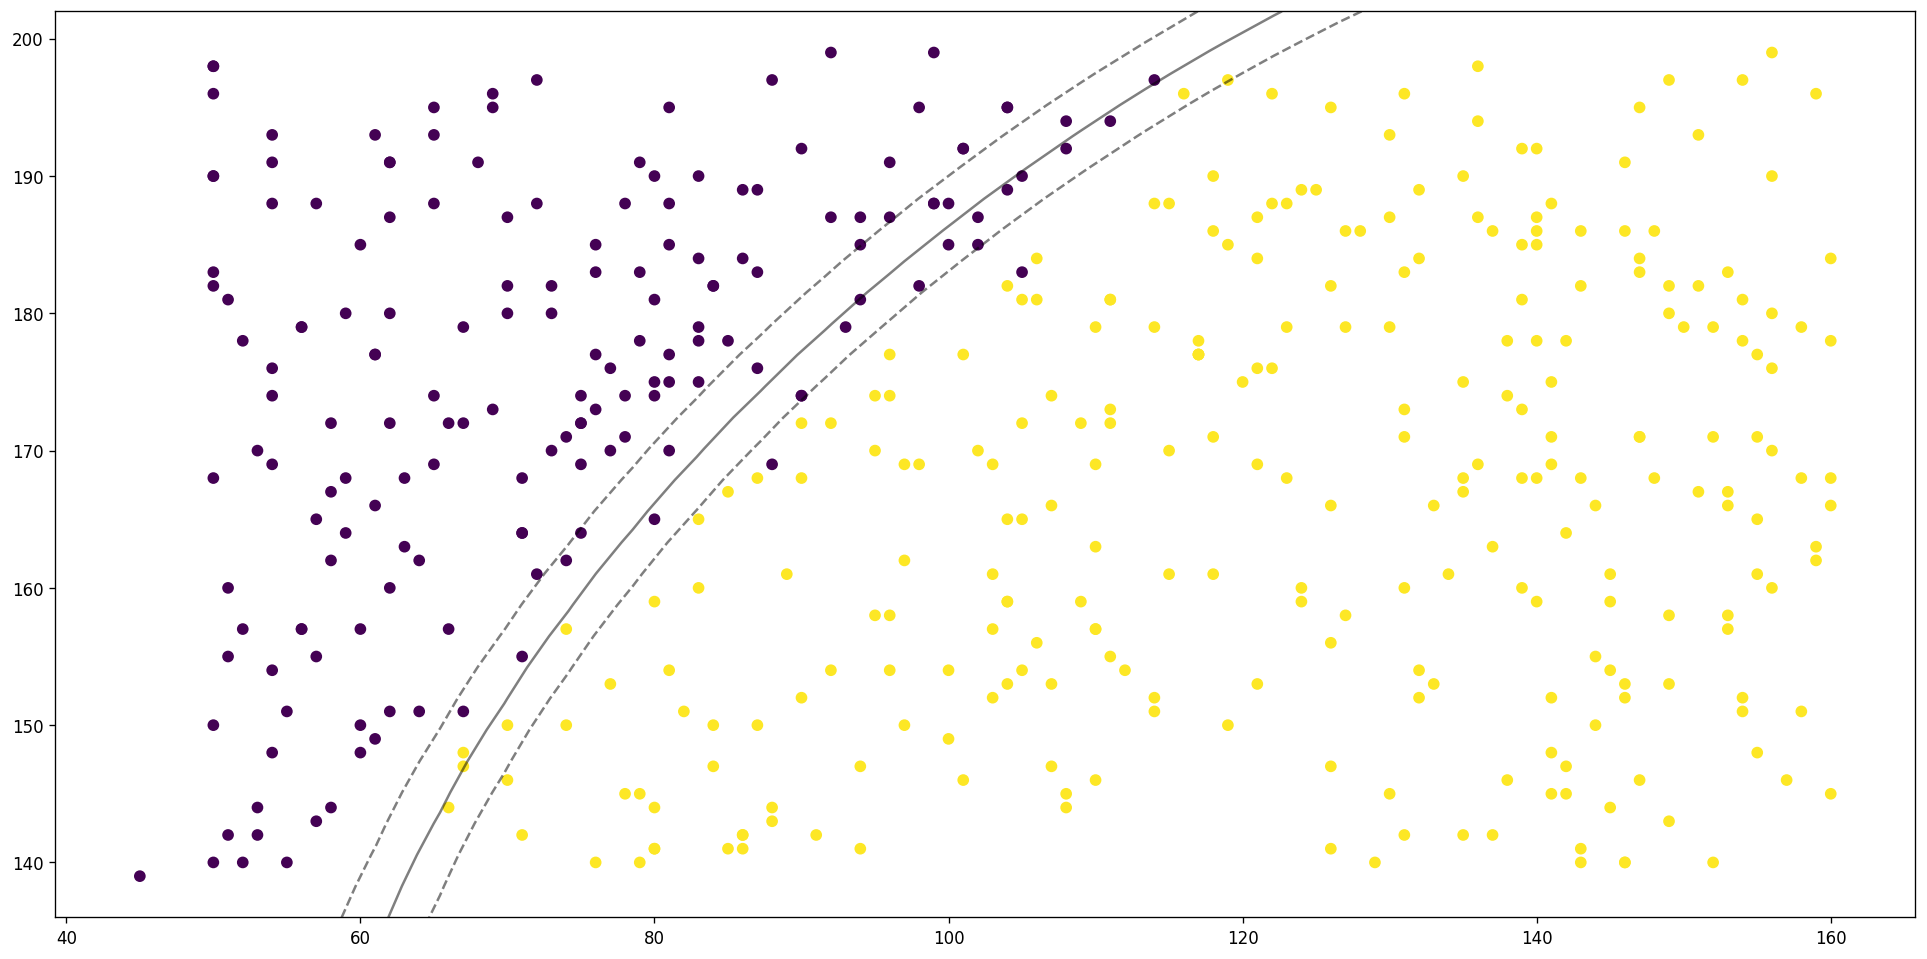

In [12]:
from matplotlib import pyplot as plt

x = X_train['Weight']
y = X_train['Height']
label = y_train

plt.figure(figsize=(20, 10), dpi=120)
plt.scatter(x, y, c=label, cmap='viridis')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T

P = classifier.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='k',
            levels=[-0.05, 0, 0.05], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.show()

In [13]:
new_fish = [[68, 163]]
classifier.predict(new_fish)

array([0])

In [16]:
classifier.score(X_test, y_test)

0.9541284403669725

### Confusion Matrix
#### (Binary Classification)
É uma tabela que possibilita a visualização do desempenho de um algoritmo de classificação

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

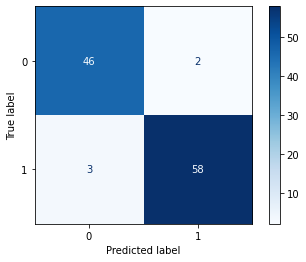

In [14]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

### Another important metrics

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(classification_report(y_test,y_pred))

# Acurácia, ou: em geral, qual o percentual de acerto?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("accuracy", accuracy)

# Precision, ou: entre os que previ serem positivos, qual o percentual de acerto?
precision = tp / (tp + fp)
print ("precision", precision)

# Recall, ou: entre os que são positivos, qual o percentual de acerto?
recall = tp / (tp + fn)
print ("recall", recall)

#f1 score: media harmônica de Precision e Recall
f1_score = 2 * ((precision * recall) / (precision + recall))
print ("f1_score", f1_score)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.97      0.95      0.96        61

    accuracy                           0.95       109
   macro avg       0.95      0.95      0.95       109
weighted avg       0.95      0.95      0.95       109

accuracy 0.9541284403669725
precision 0.9666666666666667
recall 0.9508196721311475
f1_score 0.9586776859504132
